# Bike Sharing - Linear Regression


## Reading the data and understanding

In [1]:
# import all necessary libraries and supress warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data from the spreadsheet to a dataframe
bike = pd.read_csv("day.csv")
# look at the sample data
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# look at the size of the data
bike.shape

(730, 16)

In [ ]:
# check the datatypes
bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# check null values, another way
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No Null data is observed in any of the columns

In [ ]:
# look at the mean of columns, min and max values
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation

The current Dataset has encoded values for binary and categorical variables. we can convert the categorical encoded values to types as per the data dictionary to get a clear visualization in the later parts of analysis
<br>
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2018, 1:2019)
* mnth : month ( 1 to 12)
* holiday : weather day is a holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog





Let's replace all this encoded values from the data dictionary

In [216]:

# replace season
bike['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'], inplace=True)

# replace year
# bike['yr'].replace([0,1],['2018','2019'], inplace=True)

# replace month
#bike['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# replace holiday
bike['holiday'].replace([0,1],['No','yes'], inplace=True)

# replace weekday
# bike['weekday'].replace([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday' ], inplace=True)

# replace workingday
bike['workingday'].replace([0,1],['No','Yes'], inplace=True)

# replace weather situation
bike['weathersit'].replace([1,2,3,4],['Clear','Cloudy','Snow','Severe' ], inplace=True)



In [217]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,1,No,6,No,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,1,No,0,No,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,1,No,1,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,1,No,2,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,1,No,3,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Cleaning

After looking at the data description, Following columns can be dropped.
* Instant- Since it is a incremental column like an ID for the rows and not related to the actual bike sharing data
* Date and year are un-repeatable time bound variables which can be helpufl to know on which date and which year the sales are high but using this variables for future predictions may not be feasible
* casual - this data is already included in the cnt
* registered - this data in already included in the cnt



In [218]:
# drop the unwanted columns
bike = bike.drop(['instant','dteday','yr','casual','registered'], axis = 1)


In [219]:
bike.describe()

,mnth,weekday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,6.526027,2.997260,20.319259,23.726322,62.765175,12.763620,4508.006849
std,3.450215,2.006161,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,4.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,7.000000,3.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,10.000000,5.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,12.000000,6.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [220]:
bike = bike.drop(['atemp'], axis = 1)

temp and atemp are both giving the data about the temperature of that day with a correlated mean value. They are 2 different variables of same behaviour. One of them can be dropped. I am dropping 'atemp' here

In [221]:
bike.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,1,No,6,No,Cloudy,14.110847,80.5833,10.749882,985
1,Spring,1,No,0,No,Cloudy,14.902598,69.6087,16.652113,801
2,Spring,1,No,1,Yes,Clear,8.050924,43.7273,16.636703,1349
3,Spring,1,No,2,Yes,Clear,8.200000,59.0435,10.739832,1562
4,Spring,1,No,3,Yes,Clear,9.305237,43.6957,12.522300,1600


## Visualizing the Data

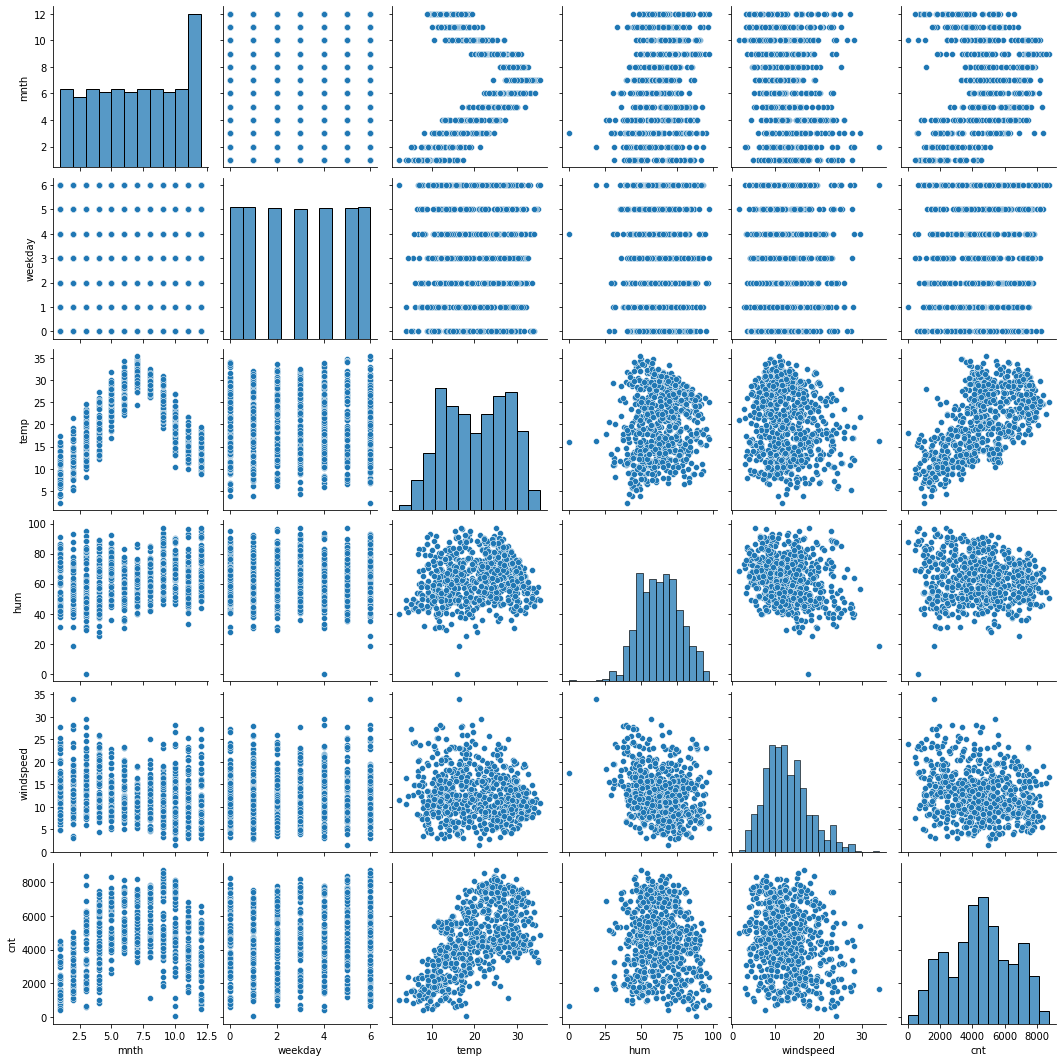

In [222]:
# visualize the data in paiplot
sns.pairplot(bike)
plt.show()


Visualize the data of Numeric Columns in pairplot
* Temp
* hum
* windspeed
* cnt

Let's take cnt on the x axis and other numeric data on y_axis for the pairplot

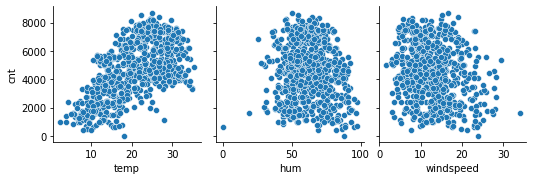

In [224]:
# visualizing the data using pairplot
sns.pairplot(data = bike, y_vars=['cnt'],x_vars=['temp','hum','windspeed'])
plt.show()

Above pairplot shows high count of rental bikes at higher temperature (between 20 and 35) and less count at 15 degress or less.
Higher wind speeds shows less count of rental bikes


Visualize the data for Categorical columns in box plot
* weathersit
* season
* holiday
* weekbike
* workingday
* mnth
* yr

Let's take count on the y axis and other categorical data on x axis

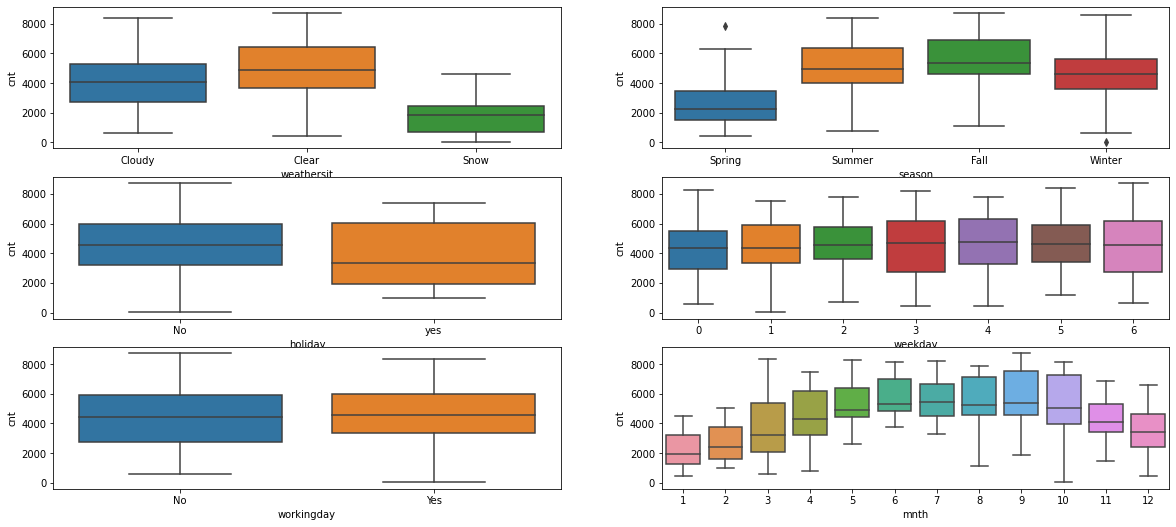

In [225]:
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
# plt.subplot(4,2,7)
# sns.boxplot(x = 'yr', y = 'cnt', data = bike)

Above box plots shows:
* Higher count on clear weather and very less count on severe weather situations. There is no data for severe weather.
* Lower count in spring. Summer and falls have decent purchases having about the same median.
* Most of the sales shows on holidays since the box range is high.
* All days of the week have the same mean. Days Saturday and Wenesday have higher sales.
* Month and season have same kind of pattern
* Count is higher on a non-working day


Let's observe the distribution of count and temperature seperately

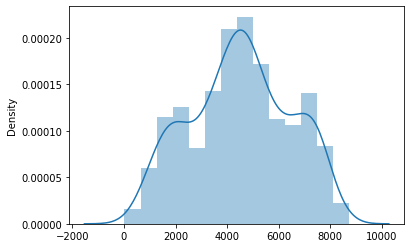

In [ ]:
cnt_df = pd.DataFrame(bike['cnt'])
sns.distplot(cnt_df)
plt.show()

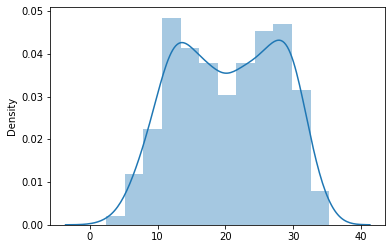

In [ ]:
temp_df = pd.DataFrame(bike['temp'])
sns.distplot(temp_df)
plt.show()

There are 2 spikes in above dist plot based on temperature

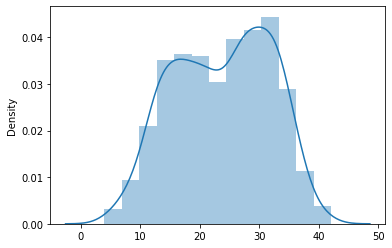

In [ ]:
temp_df = pd.DataFrame(bike['atemp'])
sns.distplot(temp_df)
plt.show()

## Data Preparation

### Dummy Variables

All categorical data is has been decoded with appropriate values before, now let's prepare dummy variables for all categorical variables dropping the first one

In [226]:
bike.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
bike['season'].astype('category').value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

Season has four levels in it. Let's add dummies and drop first

In [227]:
# Get the dummy variable for season 
season = pd.get_dummies(bike['season'], prefix = "season", drop_first=True)
season.head()

,season_Spring,season_Summer,season_Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


* 010 corresponds to Spring
* 100 corresponds to Summer
* 000 corresponds to Winter
<br>
We dropped the first column 'fall' since it is not spring, not summer and not winter, it is 'fall'

In [228]:
# review the category counts as we are not able to see all values in the head
season.astype('category').value_counts()

season_Spring  season_Summer  season_Winter
0              0              0                188
               1              0                184
1              0              0                180
0              0              1                178
dtype: int64

In [229]:
# add the dummy variables to the dataset
bike = pd.concat([bike, season], axis = 1)
bike.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter
0,Spring,1,No,6,No,Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,Spring,1,No,0,No,Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,Spring,1,No,1,Yes,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,Spring,1,No,2,Yes,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,Spring,1,No,3,Yes,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [230]:
# drop the season column
bike.drop(['season'],axis = 1, inplace = True)


In [231]:
bike.head()

,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter
0,1,No,6,No,Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,1,No,0,No,Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,1,No,1,Yes,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,1,No,2,Yes,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,1,No,3,Yes,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [232]:
bike['weathersit'].astype('category').value_counts()

Clear     463
Cloudy    246
Snow       21
Name: weathersit, dtype: int64

weather situation has 3 levels in it. Let's add dummies and drop the first column

In [233]:
# get dummies for weathersit
weathersit = pd.get_dummies(bike['weathersit'], prefix="weather", drop_first=True)
# rename the columns meaningfully
#weathersit = weathersit.rename(columns={'weather_1':'clear','weather_2':'cloudy','weather_3':'snow'})
weathersit.head()


,weather_Cloudy,weather_Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


We have 3 weather situations Clear, Cloudy and snow, we dropped the first one 'Clear' because if it is not other 2 this is true
* 00 corresponds to Clear
* 10 corresponds to Cloudy
* 01 corresponds to snow

We dropped the 'clear' column

In [234]:
# review the category counts as we are not able to see all values in the head
weathersit.astype('category').value_counts()

weather_Cloudy  weather_Snow
0               0               463
1               0               246
0               1                21
dtype: int64

In [235]:
# add the dummy variables to the dataset
bike = pd.concat([bike, weathersit], axis = 1)
bike.head()

,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weather_Cloudy,weather_Snow
0,1,No,6,No,Cloudy,14.110847,80.5833,10.749882,985,1,0,0,1,0
1,1,No,0,No,Cloudy,14.902598,69.6087,16.652113,801,1,0,0,1,0
2,1,No,1,Yes,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,1,No,2,Yes,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,1,No,3,Yes,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [236]:
# drop the weathersit column after we have added the dummy variable for it
bike.drop(['weathersit'],axis = 1, inplace = True)

In [237]:
bike.head()

,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weather_Cloudy,weather_Snow
0,1,No,6,No,14.110847,80.5833,10.749882,985,1,0,0,1,0
1,1,No,0,No,14.902598,69.6087,16.652113,801,1,0,0,1,0
2,1,No,1,Yes,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,1,No,2,Yes,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,1,No,3,Yes,9.305237,43.6957,12.522300,1600,1,0,0,0,0


We have another categorical variable month

In [238]:
# get dummies for month
month = pd.get_dummies(bike['mnth'], prefix="mnth", drop_first=True)
month.head()

,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bike = pd.concat([bike, month], axis = 1)
bike.head()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,...,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,No,Saturday,No,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,1,No,Sunday,No,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,1,No,Monday,Yes,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,1,No,Tuesday,Yes,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,1,No,Wednesday,Yes,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


We have 2 more columns holiday and working which are binary variables. Let's convert them to dummies and drop first

In [239]:
dummies1 = pd.get_dummies(bike[['holiday', 'workingday']], drop_first=True)
dummies1.head()

,holiday_yes,workingday_Yes
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1


In [240]:
#add the dummies to the dataset
bike = pd.concat([bike, dummies1], axis=1)
bike.head()

,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weather_Cloudy,weather_Snow,holiday_yes,workingday_Yes
0,1,No,6,No,14.110847,80.5833,10.749882,985,1,0,0,1,0,0,0
1,1,No,0,No,14.902598,69.6087,16.652113,801,1,0,0,1,0,0,0
2,1,No,1,Yes,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1
3,1,No,2,Yes,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1
4,1,No,3,Yes,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1


In [241]:
# remove the duplicate columns after creating the dummies
bike.drop(['workingday','holiday'], axis=1, inplace=True)
bike.head()

,mnth,weekday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weather_Cloudy,weather_Snow,holiday_yes,workingday_Yes
0,1,6,14.110847,80.5833,10.749882,985,1,0,0,1,0,0,0
1,1,0,14.902598,69.6087,16.652113,801,1,0,0,1,0,0,0
2,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1
3,1,2,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1
4,1,3,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1


## Splitting the Data into Training and Testing Sets

Let's split the data into 70% test and 30% train sets. I have already imported all necessary libraries intially. 

In [242]:
# split data into test and train
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling

It is important to scale the data using either min-max scaling or standardization so that we use data which is comprable and scalable on same scale rather than some columns having high values.
<br>
We will use min-max scaling 

In [243]:
# create the scalar object
scalar = MinMaxScaler()

In [245]:
bike.columns

Index(['mnth', 'weekday', 'temp', 'hum', 'windspeed', 'cnt', 'season_Spring',
       'season_Summer', 'season_Winter', 'weather_Cloudy', 'weather_Snow',
       'holiday_yes', 'workingday_Yes'],
      dtype='object')

In [247]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mnth','weekday','temp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scalar.fit_transform(df_train[num_vars])


In [248]:
df_train.head()

,mnth,weekday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weather_Cloudy,weather_Snow,holiday_yes,workingday_Yes
653,0.818182,0.333333,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,1
576,0.545455,0.333333,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,1
426,0.181818,1.000000,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0
728,1.000000,0.000000,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,0
482,0.272727,1.000000,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0


In [249]:
df_train.describe()

,mnth,weekday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weather_Cloudy,weather_Snow,holiday_yes,workingday_Yes
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000
mean,0.504456,0.498366,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412,0.025490,0.676471
std,0.315338,0.336182,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124,0.157763,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.166667,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.545455,0.500000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,0.818182,0.833333,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


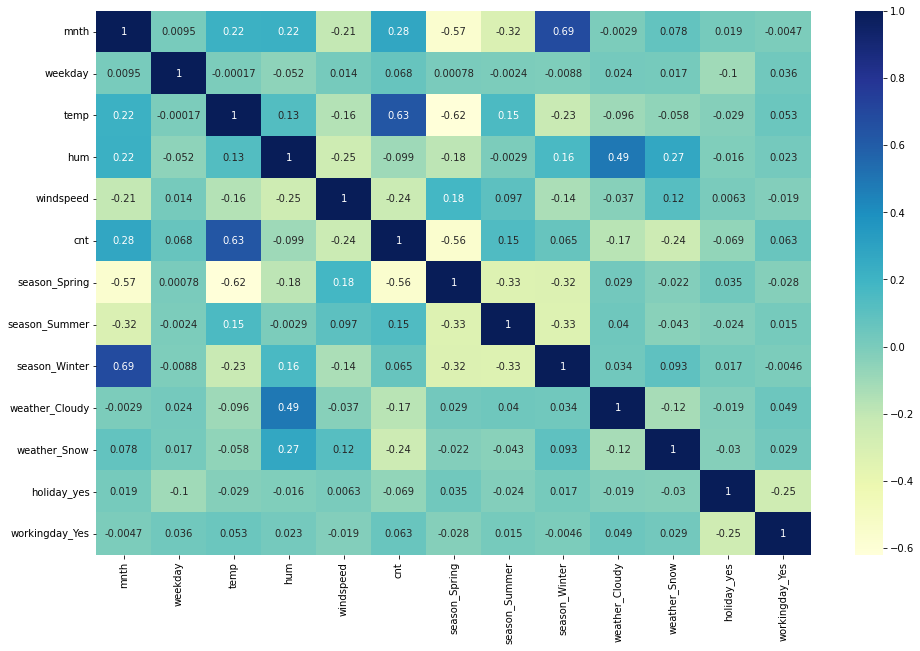

In [250]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Correlation is stronger between **
* fall season and high temperature 
* winter season and month
* spring season and low temperature 
* humidity and cloudy
which is obvious due to environmental factors.
<br><br>
**Correlation with count of sales**
* is negetive on spring season and low temperature
* is high on fall season, high temperature and clear weather situation
<br>
we do not see any high correlation between any two independent variables which suggests that there is no multicolinearity. 


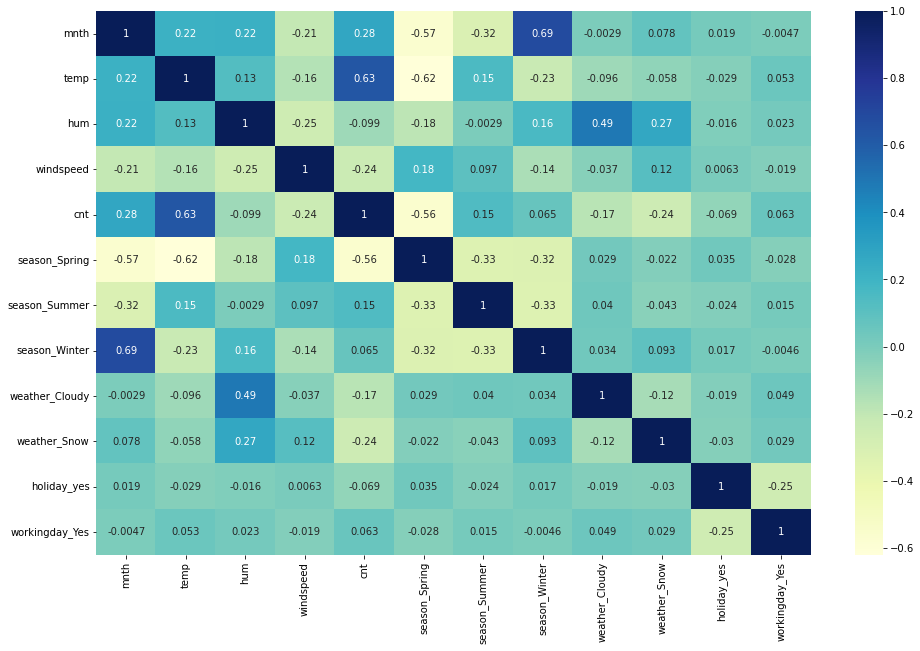

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

Let's see the three postive correlation variables in scatter plot.

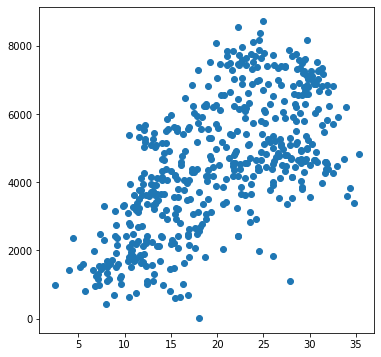

In [ ]:
# visualizing the data using pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()


KeyError: ignored

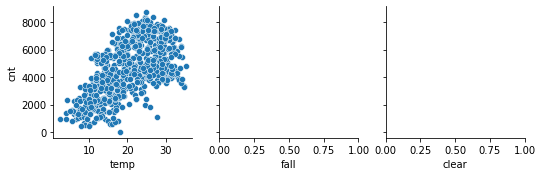

In [ ]:
sns.pairplot(data = bike, y_vars=['cnt'],x_vars=['temp','fall','clear'])
plt.show()

### Dividing into X and Y sets for the model building

In [196]:
y_train = df_train.pop('cnt')
X_train = df_train

KeyError: ignored

## Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [197]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [198]:
# Check the parameters obtained

lr.params

const    1088.043909
temp      169.051138
dtype: float64

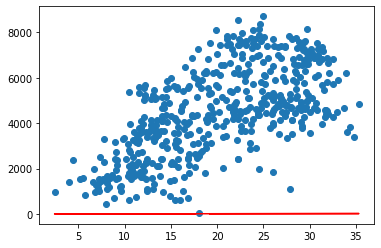

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           5.80e-61
Time:                        16:39:54   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is `0.414`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `fall`.

In [ ]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'fall']]

In [ ]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.133875
temp     0.744330
fall    -0.076711
dtype: float64

In [ ]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           8.59e-62
Time:                        04:55:18   Log-Likelihood:                 179.95
No. Observations:                 510   AIC:                            -353.9
Df Residuals:                     507   BIC:                            -341.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1339      0.022      5.951      0.0

### Adding all the variables to the model

In [ ]:
bike.columns

Index(['holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'fall', 'winter', 'clear', 'cloudy', 'snow'],
      dtype='object')

In [ ]:
#Build a linear model


X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.185915
holiday      -0.071486
weekday       0.031444
workingday    0.024712
temp          0.618818
hum          -0.246082
windspeed    -0.189323
spring       -0.025754
summer        0.069867
fall          0.008318
winter        0.133484
clear         0.160710
cloudy        0.119778
snow         -0.094573
dtype: float64

In [ ]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     61.42
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.03e-85
Time:                        04:55:41   Log-Likelihood:                 257.12
No. Observations:                 510   AIC:                            -490.2
Df Residuals:                     498   BIC:                            -439.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1859      0.036      5.124      0.0

The values we are concerned with are - 

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

1. The coefficients should have very low p value (<0.05)
The coefficient is statistically significant. So the association is not purely by chance.
<br>
p value of fall is 0.708 which is defenitely high, this can be other factor
<br>
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

2. R - squared is 0.576
Meaning that 57.6% of the variance in temperature is explained by these variables

This is a not a bad R-squared value.

3. F statistic should have a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance

### Checking VIF

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,spring,inf
7,summer,inf
8,fall,inf
9,winter,inf
10,clear,inf
11,cloudy,inf
12,snow,inf
3,temp,3.44
4,hum,1.86
5,windspeed,1.20
